# Importing Necessary Libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 2. Load the dataset.

In [104]:
df=pd.read_csv(r"C:\Users\TPGIT MCA INL SYS 49\Downloads\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 3.Perform Below Visualizations.

# 3.1 Uni-Variate

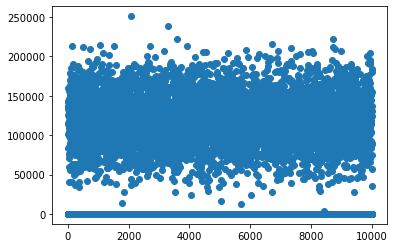

In [105]:
pot.scatter(df.index, df['Balance'])

# 3.2 Bi-Variate

Text(0, 0.5, 'EstimatedSalary')

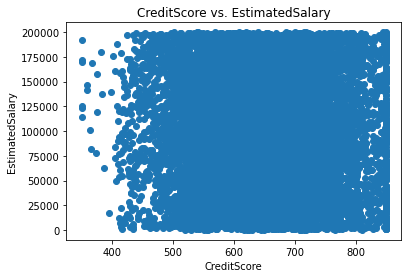

In [129]:
plt.scatter(df.CreditScore, df.EstimatedSalary)
plt.title('CreditScore vs. EstimatedSalary')
plt.xlabel('CreditScore')
plt.ylabel('EstimatedSalary')

# 3.3 Multi-Variate

In [132]:
df.loc[:, "CreditScore":"EstimatedSalary"]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


# 4. Perform descriptive statistics on the dataset.

In [106]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 5.Handle the Missing values.

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Getting NULL values in BAR graph model

<AxesSubplot:>

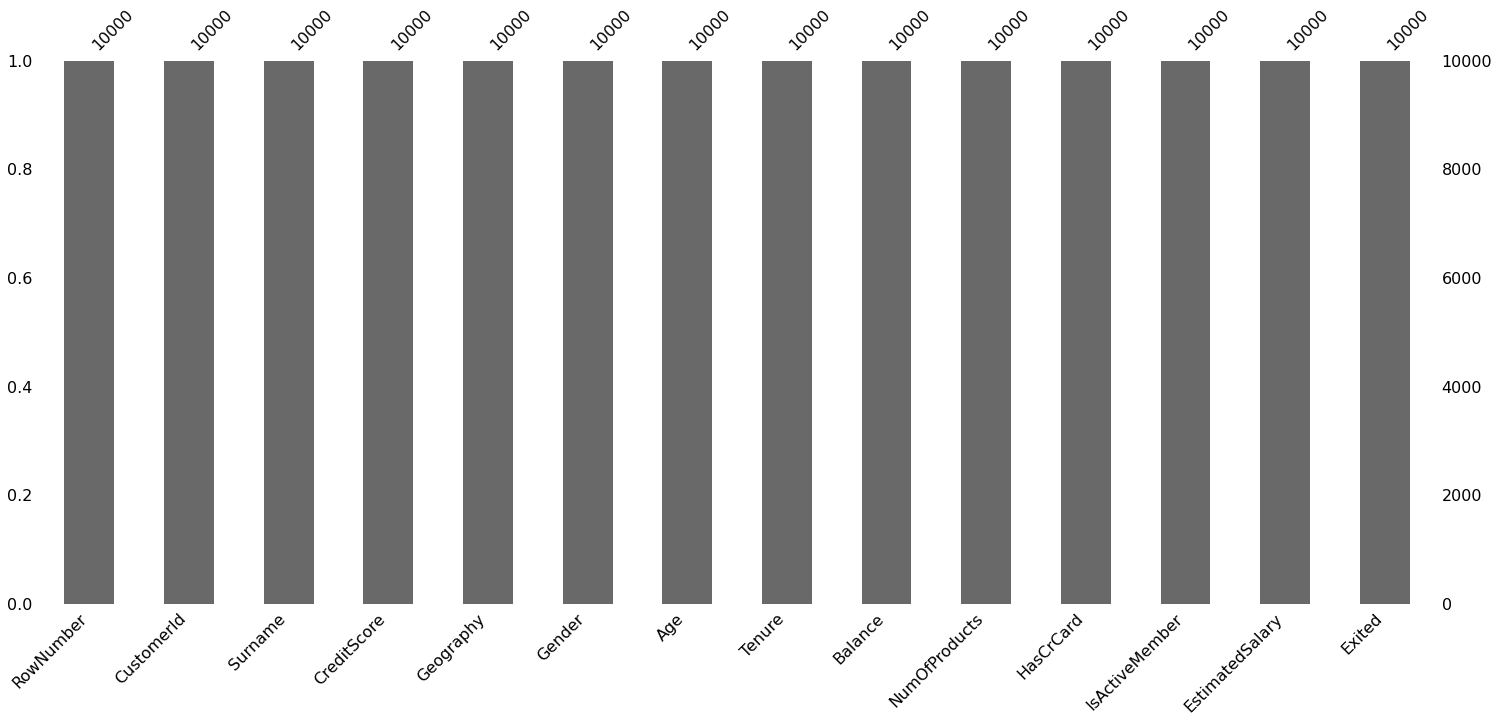

In [108]:
msno.bar(df)

# Getting NULL values in Matrix method

<AxesSubplot:>

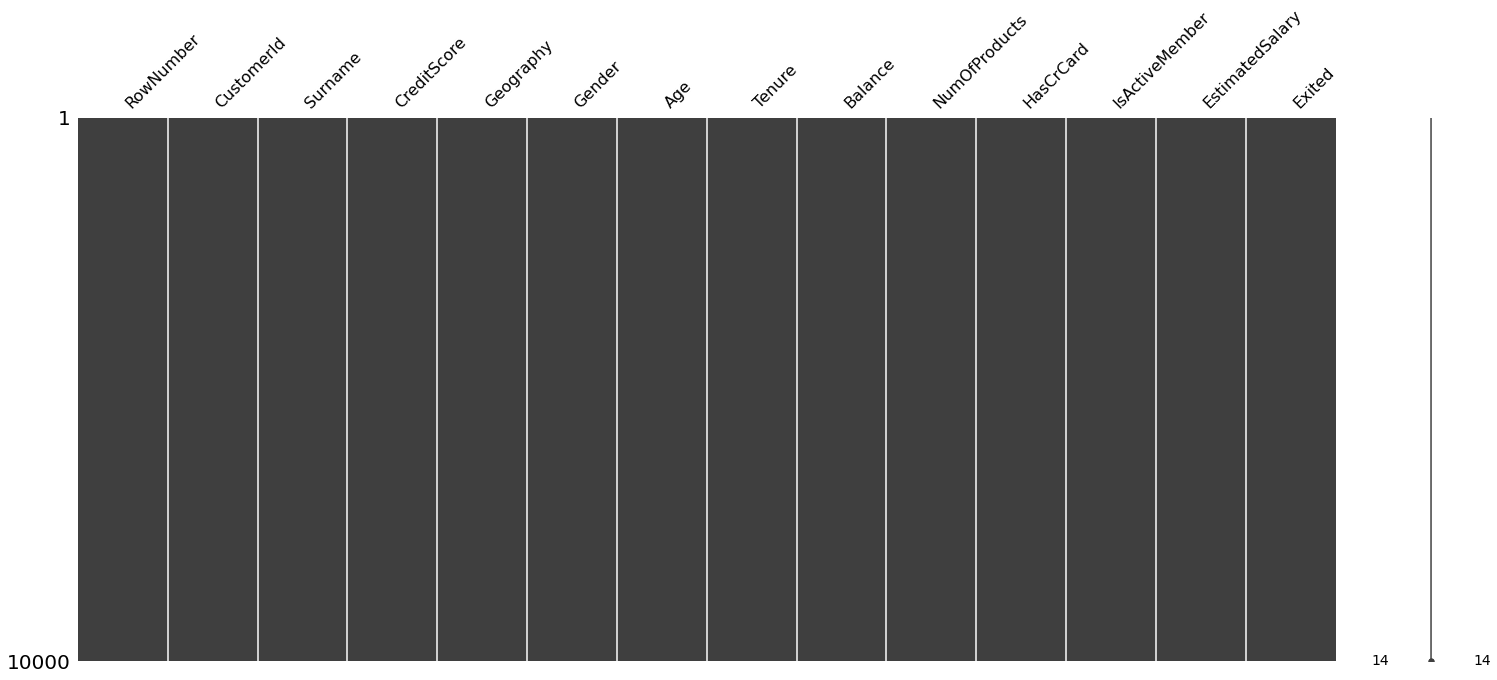

In [109]:
msno.matrix(df)

# 6. Find the outliers and replace the outliers

In [110]:
fig=px.histogram(df, x='Age')
fig.show()

In [111]:
fig1 = px.box(df, y='Age')

fig1.show()

# Finding Outliers

In [112]:
df1=df[(df['Age'] > 28) | (df['Age'] <39)]
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Removig or Trimmming Outliers

In [113]:
new_df = df[(df['Age'] >28) & (df['Age']<38)]
new_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
12,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0
14,15,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0
21,22,15597945,Dellucci,636,Spain,Female,32,8,0.00,2,1,0,138555.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


# 7. Check for Categorical columns and perform encoding.

In [114]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [115]:
obj_df[obj_df.isnull().any(axis=1)]

,Surname,Geography,Gender


# Method 1:

In [116]:
obj_df.dtypes

Surname      object
Geography    object
Gender       object
dtype: object

# Method 2:

In [117]:
cols = df.columns

In [118]:
num_cols = df._get_numeric_data().columns
num_cols

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [119]:
list(set(cols) - set(num_cols))

['Surname', 'Geography', 'Gender']

# 8. Split the data into dependent and independent variables.

# --Split a Pandas Dataframe by Column Value

In [120]:
grouped = df.groupby(df['Surname'])
print(grouped.get_group('Hargrave'))

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       2      0.0              1          1               1        101348.88   

   Exited  
0       1  


In [121]:
print(df["EstimatedSalary"].min())
print(df["EstimatedSalary"].max())
print(df["EstimatedSalary"].mean())

11.58
199992.48
100090.2398809998


In [122]:
print(df["Balance"].min())
print(df["Balance"].max())
print(df["Balance"].mean())

0.0
250898.09
76485.88928799961


In [123]:
print(df.count(0))

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64


In [124]:
x = df.iloc[:, 0:1].values
y = df.iloc[:, 1]
print(x,'\n')
print(y,'\n')

[[    1]
 [    2]
 [    3]
 ...
 [ 9998]
 [ 9999]
 [10000]] 

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64 



# 9. Scale the independent variables

In [144]:
dataset =pd.read_csv(r"C:\Users\TPGIT MCA INL SYS 49\Downloads\Churn_Modelling.csv")
object= StandardScaler()

#  10. Split the data into training and testing

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [126]:
print("shape of original dataset :", df.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (10000, 14)
shape of input - training set (8000, 1)
shape of output - training set (8000,)
shape of input - testing set (2000, 1)
shape of output - testing set (2000,)
